# Unsupervised Learning in R
link: https://www.datacamp.com/courses/unsupervised-learning-in-r

### Course Description
Many times in machine learning, the goal is to find patterns in data without trying to make predictions. This is called unsupervised learning. One common use case of unsupervised learning is grouping consumers based on demographics and purchasing history to deploy targeted marketing campaigns. Another example is wanting to describe the unmeasured factors that most influence crime differences between cities. This course provides a basic introduction to clustering and dimensionality reduction in R from a machine learning perspective, so that you can get from data to insights as quickly as possible.

### Note how can Resizing plots in the R kernel for Jupyter notebooks
https://blog.revolutionanalytics.com/2015/09/resizing-plots-in-the-r-kernel-for-jupyter-notebooks.html

    library(repr)

    # Change plot size to 4 x 3
    options(repr.plot.width=4, repr.plot.height=3)
    
### Note2 Generate a table 

https://www.tablesgenerator.com/markdown_tables


other: Book: machine learning with R by Brett Lantz
Learn about `attr` function


### Note 3 - DataFrames


In [1]:
library(dplyr)
library(ggplot2)
library(readr)
library(tidyr)
library(datasets)
library(openintro)

library(readr)
path_csv<-"https://assets.datacamp.com/production/course_6430/datasets/Pokemon.csv"
df_pokemon<-read_csv(path_csv)

path_csv<-"https://assets.datacamp.com/production/course_6430/datasets/WisconsinCancer.csv"
WisconsinCancer<-read_csv(path_csv)


Warning message:
"package 'dplyr' was built under R version 3.5.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'ggplot2' was built under R version 3.5.3"Warning message:
"package 'readr' was built under R version 3.5.3"Warning message:
"package 'openintro' was built under R version 3.5.2"Please visit openintro.org for free statistics materials

Attaching package: 'openintro'

The following object is masked from 'package:ggplot2':

    diamonds

The following objects are masked from 'package:datasets':

    cars, trees

Parsed with column specification:
cols(
  Number = col_double(),
  Name = col_character(),
  Type1 = col_character(),
  Type2 = col_character(),
  Total = col_double(),
  HitPoints = col_double(),
  Attack = col_double(),
  Defense = col_double(),
  SpecialAttack = col_double(),
  SpecialDefense

## 1) Unsupervised learning in R
The k-means algorithm is one common approach to clustering. Learn how the algorithm works under the hood, implement k-means clustering in R, visualize and interpret the results, and select the number of clusters when it's not known ahead of time. By the end of the chapter, you'll have applied k-means clustering to a fun "real-world" dataset!

### 1.1) (video) Welcome to the course!
In the first chapter, I'll define `unsupervised learning` providing overview the 3 major types of machine learning and you will learn execute one particular  type of unsupervised learning using R.

There are 3 major types of machine learning:

    1) Unsupervised learning: the goal in unsupervised learning is find structure in unlabeled data (unlabeled data is data whith out target , without lebeled response)
    2) Supervised learning : it´s use when you want make predictions on labeled data  (type of predictions include: regresion or predictive how much something  there is or could be and classification which is predicting what type or class something is or could be)  
    3) Reinforcement learning, when computer learn feedback operating in real or synthetic enviroment 

 In unsupervised learning there are 2 major goals:

    1) findig homegenous subgroup within larger group (clustering)
    2) finding patterns in the features of the data one way to do this is by `dimensionality reduction`, it's a method to decrease the number of features to describre an observation, and how mantain the maximum information contet under to constrain lower dimensionality.
    
### 1.2) (video) Introduction to k-means clustering
k-means is a clustering algorithm, an algorithm that try to find homogeneous subgroups with in a population, this works by first assuming the numbers of the subgroups of clusters in the data and then assign each observation to one of these subgroups.

K-means in R comes with the base  R install, we can invoces `kmeans` function as:

    kmeans(x, centers = #, nstart = 20)

- `centers`: numbers of predetermine groups of cluster
- `nstart` : how many time the algorithm will be repeated.

kmeans has a random component but it can run algorithm multiple times to improve odds of the best model.

#### 1.2.1) Results of kmeans()
The `kmeans()` function produces several outputs. In the video, we discussed one output of modeling, the cluster membership.

In this exercise, you will access the `cluster` component directly. This is useful anytime you need the cluster membership for each observation of the data used to build the clustering model. A future exercise will show an example of how this cluster membership might be used to help communicate the results of k-means modeling.

k-means models also have a print method to give a human friendly output of basic modeling results. This is available by using `print()` or simply typing the name of the model.

**Exercise**

The k-means model you built in the last exercise, `km.out`, is still available in your workspace.

- Print a list of the cluster membership to the console.
- Use a print method to print out the km.out model.

*Answer*

    # Print the cluster membership component of the model
    km.out$cluster

    # Print the km.out object
    print(km.out)

#### 1.2.2) Visualizing and interpreting results of kmeans()
One of the more intuitive ways to interpret the results of k-means models is by plotting the data as a scatter plot and using color to label the samples' cluster membership. In this exercise, you will use the standard `plot()` function to accomplish this.

To create a scatter plot, you can pass data with two features (i.e. columns) to `plot()` with an extra argument `col = km.out$cluster`, which sets the color of each point in the scatter plot according to its cluster membership.

**Exercise**
`x` and `km.out` are available in your workspace. Using the `plot()` function to create a scatter plot of data x:

- Color the dots on the scatterplot by setting the `col` argument to the cluster component in km.out.
- Title the plot `"k-means with 3 clusters"` using the `main` argument to plot().
- Ensure there are no axis labels by specifying `""` for both the `xlab` and `ylab` arguments to plot().

*Answer*

    plot(x, col = km.out$cluster, main = "k-means with 3 clusters", ylab = "", xlab = "")


###  1.3) (video) How kmeans() works and practical matters

Now we will see intuition how "k means" is building.

- it will start by randomly assignment each feature to a subgroup
- the next step in the algorithm is calculate the intersection of each group, the `centers` in each group is average position of all point in that subgroup. 
- next each point will be assigned to closser centers 

this procces complete the first iteration, the algorithm will be finished when the points won't change of assigment.

Note: there are others criterios to stop the algorithm like the numbers of iteration or the movement of a certain distance.

#### 1.3.1) Handling random algorithms
In the video, you saw how `kmeans()` randomly initializes the centers of clusters. This random initialization can result in assigning observations to different cluster labels. Also, the random initialization can result in finding different local minima for the k-means algorithm. This exercise will demonstrate both results.

At the top of each plot, the measure of model quality—total within cluster sum of squares error—will be plotted. Look for the model(s) with the lowest error to find models with the better model results.

Because kmeans() initializes observations to random clusters, it is important to set the random number generator seed for reproducibility.

**Exercise**

The data, `x`, is still available in your workspace. Your task is to generate six `kmeans()` models on the data, plotting the results of each, in order to see the impact of random initializations on model results.

- Set the random number seed to 1 with `set.seed()`.
- For each iteration of the `for` loop, run `kmeans()` on x. Assume the number of clusters is 3 and number of starts (`nstart`) is 1.
- Visualize the cluster memberships using the `col` argument to `plot()`. Observe how the measure of quality and cluster assignments vary among the six model runs.

*Answer*

    # Set up 2 x 3 plotting grid
    par(mfrow = c(2, 3))

    # Set seed
    set.seed(1)

    for(i in 1:6) {
      # Run kmeans() on x with three clusters and one start
      km.out <- kmeans(x, centers = 3, nstart = 1)

      # Plot clusters
      plot(x, col = km.out$cluster, 
           main = km.out$tot.withinss, 
           xlab = "", ylab = "")
    }

#### 1.3.2) Selecting number of clusters
The k-means algorithm assumes the number of clusters as part of the input. If you know the number of clusters in advance (e.g. due to certain business constraints) this makes setting the number of clusters easy. However, as you saw in the video, if you do not know the number of clusters and need to determine it, you will need to run the algorithm multiple times, each time with a different number of clusters. From this, you can observe how a measure of model quality changes with the number of clusters.

In this exercise, you will run `kmeans()` multiple times to see how model quality changes as the number of clusters changes. Plots displaying this information help to determine the number of clusters and are often referred to as **scree plots**.

The ideal plot will have an **elbow** where the quality measure improves more slowly as the number of clusters increases. This indicates that the quality of the model is no longer improving substantially as the model complexity (i.e. number of clusters) increases. In other words, the elbow indicates the number of clusters inherent in the data.

**Exercise**
The data, `x`, is still available in your workspace.

- Build 15 `kmeans()` models on x, each with a different number of clusters (ranging from 1 to 15). Set `nstart = 20` for all model runs and save the total within cluster sum of squares for each model to the `i`th element of `wss`.
- Run the code provided to create a scree plot of the `wss` for all 15 models.
- Take a look at your scree plot. How many clusters are inherent in the data? Set `k` equal to the number of clusters at the location of the elbow.

*Answer*

    # Initialize total within sum of squares error: wss
    wss <- 0


    # For 1 to 15 cluster centers
    for (i in 1:15) {
      km.out <- kmeans(x, centers = i, nstart = 20)
      # Save total within sum of squares to wss variable
      wss[i] <- km.out$tot.withinss
    }


    # Plot total within sum of squares vs. number of clusters
    plot(1:15, wss, type = "b", 
         xlab = "Number of Clusters", 
         ylab = "Within groups sum of squares")

    # Set k equal to the number of clusters corresponding to the elbow location
    k <- 2

### 1.4) (video) Introduction to the Pokemon data

#### 1.4.1) Practical matters: working with real data
Dealing with real data is often more challenging than dealing with synthetic data. Synthetic data helps with learning new concepts and techniques, but the next few exercises will deal with data that is closer to the type of real data you might find in your professional or academic pursuits.

The first challenge with the `Pokemon` data is that there is no pre-determined number of clusters. You will determine the appropriate number of clusters, keeping in mind that in real data the elbow in the scree plot might be less of a sharp elbow than in synthetic data. Use your judgement on making the determination of the number of clusters.

The second part of this exercise includes plotting the outcomes of the clustering on two dimensions, or features, of the data. These features were chosen somewhat arbitrarily for this exercise. Think about how you would use plotting and clustering to communicate interesting groups of Pokemon to other people.

An additional note: this exercise utilizes the `iter.max` argument to `kmeans()`. As you've seen, `kmeans()` is an iterative algorithm, repeating over and over until some stopping criterion is reached. The default number of iterations for `kmeans()` is `10`, which is not enough for the algorithm to converge and reach its stopping criterion, so we'll set the number of iterations to `50` to overcome this issue. To see what happens when `kmeans()` does not converge, try running the example with a lower number of iterations (e.g. 3). This is another example of what might happen when you encounter real data and use real cases.

**Exercise**
The `pokemon` dataset, which contains observations of 800 Pokemon characters on 6 dimensions (i.e. features), is available in your workspace.

- Using `kmeans()` with `nstart = 20`, determine the total within sum of square errors for different numbers of clusters (between 1 and 15).
- Pick an appropriate number of clusters based on these results from the first instruction and assign that number to k.
- Create a k-means model using k clusters and assign it to the km.out variable.
- Create a scatter plot of Defense vs. Speed, showing cluster membership for each observation.

*Answer*


In [4]:
pokemon<-as.matrix (df_pokemon[,6:11])
#head(pokemon)

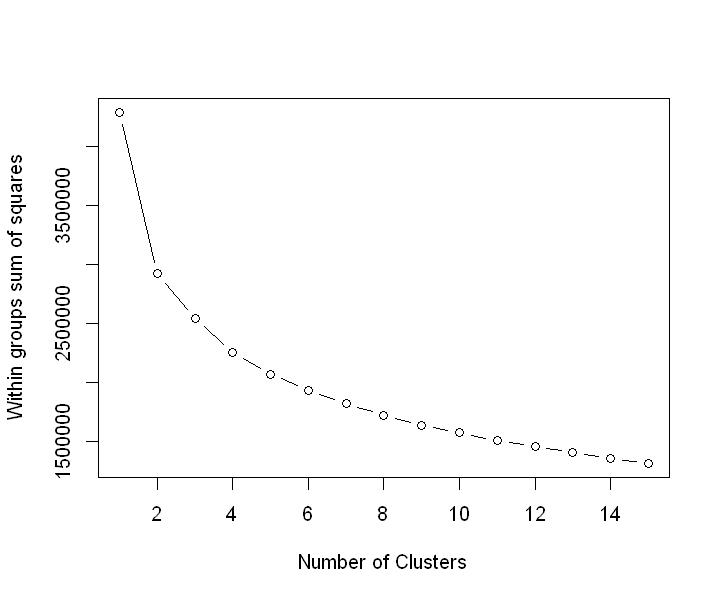

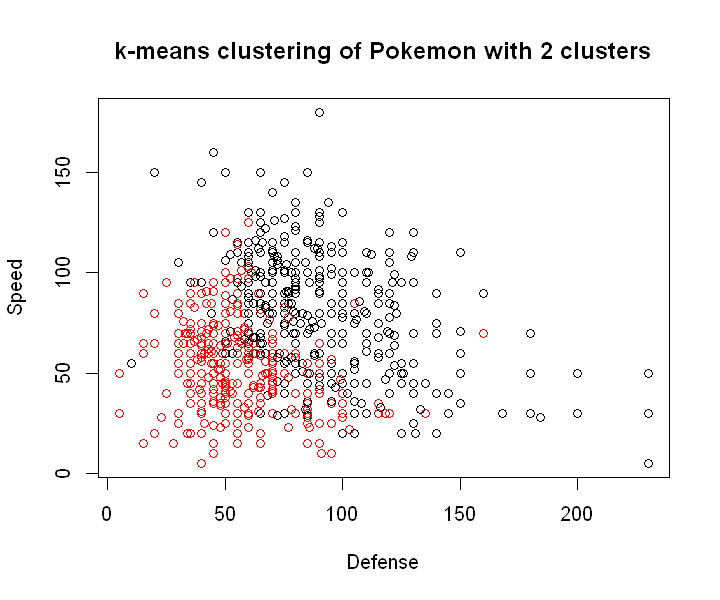

In [5]:
library(repr)
# Change plot size to 4 x 3
    options(repr.plot.width=6, repr.plot.height=5)


# Initialize total within sum of squares error: wss
wss <- 0

# Look over 1 to 15 possible clusters
for (i in 1:15) {
  # Fit the model: km.out
  km.out <- kmeans(pokemon, centers = i, nstart = 20, iter.max = 50)
  # Save the within cluster sum of squares
  wss[i] <- km.out$tot.withinss
}

# Produce a scree plot
plot(1:15, wss, type = "b", 
     xlab = "Number of Clusters", 
     ylab = "Within groups sum of squares")

# Select number of clusters
k <- 2

# Build model with k clusters: km.out
km.out <- kmeans(pokemon, centers = k, nstart = 20, iter.max = 50)

# View the resulting model
#km.out

# Plot of Defense vs. Speed by cluster membership
plot(pokemon[, c("Defense", "Speed")],
     col = km.out$cluster,
     main = paste("k-means clustering of Pokemon with", k, "clusters"),
     xlab = "Defense", ylab = "Speed")


## 2) Hierarchical clustering
Hierarchical clustering is another popular method for clustering. The goal of this chapter is to go over how it works, how to use it, and how it compares to k-means clustering.

### 2.1) (video) Introduction to hierarchical clustering

- it is used when the number of cluster is not know ahead of time 
- there are 2 approaches : `bottom-up` and `top-down`, in this course we will focused in `bottom-up` 

We will see an example of 5 observation and 2 features:
1. bottom-up clustering starts by assigning each observation as a cluster 
2. Next the `bottom-up`  clustering find the closest two cluster and joined them together in a single cluster
3. this process continues iteratively finding the next pair of clusteres, that there are closest each other and combaining them in a single clusters.

Performing hierarchical clustering in R requires, only one parameter:

    #calculate similarity as Euclidean distance between obsevations 
    dist_matrix<- dist(x)

    #returns hierarchical clustering model
    hclust(d = dist_matrix)



### 2.2 (video) Selecting number of clusters
now you have created your first hierarchical clustering in R it's time to see how interpret it, if you look the model through to the function `summary` the output would be very technique and it's not very useful honestly.

The best way interprete a hierarchical clustering is though a `dendogram` in which you represent each obsevation and their group or subgroup respectevely and on the axis y, we will represent the distance between each cluster or `height` (in our case euclidean distance)

To create a dendogram in R our output of model is passed to "plot" function 

    #draws a dendogram
    plot(hclust.out)

the next step typically in hierarchical clustering is determine the number of clusters you want in the model, this is one key model selecting step in the algorithm, a way to think about this is strong cut line on particular "hight" or "distance "  between the clusters. 

    #one option is
    abline(h = 6, col = "red")

finally to take each cluster assigments you can use the `cutree` function in R, we can define the height or the number of clusters you want. 

    #cut by height h
    cutree(hclust.out,  h = 6)

    #cut by number of clusters k
    cutree(hclust.out,  k = 2)


### 2.3 (video) Clustering linkage and practical matters
There are some details that are important to cover before to continue with our method like:  how is distance between clusters determined? after the method clustering two first observations, the method needs rules, how measure the distance between clusters? there are four methods in R to measure similiarity between clusters (it to determine wich clusters shoul be linked).

- `Complete` : pairwise similarity between all observations in cluster 1 and cluster 2, and uses largest of similarities.
- `Single` same as above but uses smallest of similarities.
- `Average`: same as above but uses average of similarities
- ` Centroid` : find centroid of cluster 1 and centroid of cluster 2, and uses similarity between two centroids.

linkage `Complete` criteria produces balanced tree and it is the most common used, other hand `single` produce unbalanced trees.

You can define this behavior only  using the `method` paramether on `hclust` function as:

    #fitting hierarchical clustering models using different methods
    h.clust.complete<-hclust(d, method = "complete")
    h.clust.average<-hclust(d, method = "average")
    h.clust.single<-hclust(d, method = "single")

other practical matter is when your data has different scales, these can cause undesirable result in clustering methods to resolve this the data is transformed to linear transormations before performing clustering, this transformation substracs the mean of a feature from all observations and divide each feature by the standart deviation of the feature, this called normalization (we need to do the previous  solution if any features have different scales, even when the same scales are avalible over each feature, it´s good practive because the features can could have diffrente variabilities)

    #check if scalling is necessary
    colMeans(x)

    #sd over axis 2 
    apply(x, 2 , sd)

    #produce new matrix with columns of mean of 0 and sd of 1
    scaled_x<-scale(x)


#### 2.3.1) Practical matters: scaling
Recall from the video that clustering real data may require scaling the features if they have different distributions. So far in this chapter, you have been working with synthetic data that did not need scaling.

In this exercise, you will go back to working with "real" data, the `pokemon` dataset introduced in the first chapter. You will observe the distribution (mean and standard deviation) of each feature, scale the data accordingly, then produce a hierarchical clustering model using the complete linkage method.

**Exercise**
The data is stored in the `pokemon` object in your workspace.

- Observe the mean of each variable in pokemon using the `colMeans()` function.
- Observe the standard deviation of each variable using the `apply()` and `sd()` functions. Since the variables are the columns of your matrix, make sure to specify `2` as the `MARGIN` argument to `apply()`.
- Scale the pokemon data using the `scale()` function and store the result in `pokemon.scaled`.
- Create a hierarchical clustering model of the `pokemon.scaled` data using the `complete` linkage method. Manually specify the method argument and store the result in `hclust.pokemon`

*Answer*

In [6]:
#pokemon<-as.matrix (df_pokemon[,6:11])
#head(pokemon)


# View column means
colMeans(pokemon)

# View column standard deviations
apply(pokemon, MARGIN = 2, sd)

# Scale the data
pokemon.scaled<-scale(pokemon)

# Create hierarchical clustering model: hclust.pokemon
hclust.pokemon<- hclust(dist(pokemon.scaled), method = "complete")


HitPoints         Attack        Defense  SpecialAttack SpecialDefense 
      69.25875       79.00125       73.84250       72.82000       71.90250 
         Speed 
      68.27750

HitPoints         Attack        Defense  SpecialAttack SpecialDefense 
      25.53467       32.45737       31.18350       32.72229       27.82892 
         Speed 
      29.06047

#### 2.3.2) Comparing kmeans() and hclust()
Comparing k-means and hierarchical clustering, you'll see the two methods produce different cluster memberships. This is because the two algorithms make different assumptions about how the data is generated. In a more advanced course, we could choose to use one model over another based on the quality of the models' assumptions, but for now, it's enough to observe that they are different.

This exercise will have you compare results from the two models on the `pokemon` dataset to see how they differ.

**Exercise**
The results from running k-means clustering on the `pokemon` data (for 3 clusters) are stored as `km.pokemon`. The hierarchical clustering model you created in the previous exercise is still available as `hclust.pokemon`.

- Using `cutree()` on `hclust.pokemon`, assign cluster membership to each observation. Assume three clusters and assign the result to a vector called `cut.pokemon`.
- Using `table()`, compare cluster membership between the two clustering methods. Recall that the different components of k-means model objects can be accessed with the `$` operator.


*Answer*


In [11]:
#scale the data 
pokemon.scaled<-scale(pokemon)

#create hierarchical clustering and kmeans clustering models
hclust.pokemon<- hclust(dist(pokemon.scaled), method = "complete")
km.pokemon <- kmeans(pokemon.scaled, centers = 3, nstart = 20, iter.max = 50)


# Apply cutree() to hclust.pokemon: cut.pokemon
cut.pokemon <- cutree(hclust.pokemon, k = 3)

# Compare methods
table(km.pokemon$cluster, cut.pokemon)

   cut.pokemon
      1   2   3
  1 242   1   0
  2 342   1   0
  3 204   9   1

## 3) Dimensionality reduction with PCA
`Principal component analysis`, or `PCA`, is a common approach to dimensionality reduction. Learn exactly what PCA does, visualize the results of PCA with biplots and scree plots, and deal with practical issues such as centering and scaling the data before performing PCA.

### 3.1) (video) Introduction to PCA
the next type of unsupervised learning is "Dimensionality Reduction" this has two main goals:

-  find structure in features and 
-  aid in visualization 

in this course we will cover one popular method of dimensionality reduction `Principal Component Analysis (PCA)` , which has 3 goals:

- PCA finds linear combination of variables to create principal components
-  Mantain most variance in the data.
- Principal components are uncorrelated (i.e orhogonal to each other)

to create a PCA in r we need:
    
    pr.iris<- prcomp (x = iris[-5], scale = FALSE, center = TRUE)

where `scale` paramater indicates that data should be scale with standar diviation of 1 before performance the PCA , the `center` parameter indicates if the new paramet should be center around zero before performance the PCA (we recomended define this parameter as TRUE)

after that we can see each proportion as:
    
    summary(pr.iris)
    
#### 3.1.1) PCA using prcomp()
In this exercise, you will create your first PCA model and observe the diagnostic results.

We have loaded the Pokemon data from earlier, which has four dimensions, and placed it in a variable called pokemon. Your task is to create a PCA model of the data, then to inspect the resulting model using the summary() function.  


**Exercise**
- Create a `PCA` model of the data in `pokemon`, setting scale to `TRUE`. Store the result in `pr.out`.
- Inspect the result with the `summary()` function.

*Answer*


In [2]:
a<-(as.data.frame(df_pokemon[,2]))
#class(a$Name)

pokemon<-as.matrix (df_pokemon[,6:9], 
                    dimnames = list (a$Name, c("HitPoints","Attact","Defense","Speed") ) ,
                    ncol = 4)
rownames(pokemon)<- a$Name
pokemon<-pokemon[1:50,]


# Perform scaled PCA: pr.out
pr.out<-prcomp(pokemon, scale = TRUE, center = TRUE)

# Inspect model output
summary(pr.out)

Importance of components:
                          PC1    PC2    PC3     PC4
Standard deviation     1.6049 0.7932 0.7133 0.53506
Proportion of Variance 0.6439 0.1573 0.1272 0.07157
Cumulative Proportion  0.6439 0.8012 0.9284 1.00000

#### 3.1.2) Results of PCA
This exercise will check your understanding of the `summary()` of a PCA model. Your model from the last exercise, `pr.out`, and the `pokemon` dataset are still available in your workspace.

What is the minimum number of principal components that are required to describe at least 75% of the cumulative variance in this dataset?

*Answer*

it´s 2, Right! The first two principal components describe around 77% of the variance.

#### 3.1.3) Additional results of PCA
`PCA` models in R produce additional diagnostic and output components:

- `center`: the column means used to center to the data, or FALSE if the data weren't centered
- `scale`: the column standard deviations used to scale the data, or FALSE if the data weren't scaled
- `rotation`: the directions of the principal component vectors in terms of the original features/variables. This information allows you to define new data in terms of the original principal components
- `x`: the value of each observation in the original dataset projected to the principal components

You can access these the same as other model components. For example, use `pr.out$rotation` to access the `rotation` component.

Which of the following statements is not correct regarding the `pr.out` model fit on the pokemon data?

*Answer*

The directions of the principal component vectors are presented in a table with the same dimensions as the original data.

Right! Calling dim() on pr.out$rotation and pokemon, you can see they have different dimensions.


In [54]:
pr.out$rotation 

,PC1,PC2,PC3,PC4
HitPoints,0.4535025,0.82846936,-0.1834232,0.2726351
Attack,0.4921096,-0.32906209,-0.7409311,-0.3171237
Defense,0.5241093,-0.45111718,0.2599976,0.6739466
SpecialAttack,0.5267571,0.04301098,0.5914206,-0.6090145


### 3.2 (video) Visualizing and interpreting PCA results
in this chapter we will explore additional visualizations often used to understand PCA models.

- Biplot, this shows all orignal observations as points of the 2 principal components 
- Scree plot either shows the proportion varianza explained for each principal component or show the accumulated percent varianza explained for each component.

to create both graphs in R we need:

    #creating a biplot
    pr.iris<- prcomp(x = iris[-5], scale = FALSE, center = TRUE)
    biplot(pr.iris)

Note: to create a scree plot, we need additional steps:

    #getting proportion of variance for scree plot
    pr.var<-pr.iris$sdev^2
    pve<- pr.var/sum(pr.var)

    #plot variance explained for each principal component
    plot(pve, xlab = "Principal Component", 
    ylab = "Proportion of Variance Explained", 
    ylim = c(0, 1), type = "b")
        

#### 3.2.1) Interpreting biplots (1)
As stated in the video, the `biplot()` function plots both the principal components loadings and the mapping of the observations to their first two principal component values. The next couple of exercises will check your interpretation of the biplot() visualization.

Using the biplot() of the `pr.out` model, which two original variables have approximately the same loadings in the first two principal components?

    Attack and HitPoints
    
#### 3.2.3) Variance explained
The second common plot type for understanding PCA models is a scree plot. A scree plot shows the variance explained as the number of principal components increases. Sometimes the cumulative variance explained is plotted as well.

In this and the next exercise, you will prepare data from the pr.out model you created at the beginning of the chapter for use in a scree plot. Preparing the data for plotting is required because there is not a built-in function in R to create this type of plot. 

**Exercise**
`pr.out` and the `pokemon` data are still available in your workspace.

- Assign to the variable `pr.var` the square of the standard deviations of the principal components (i.e. the variance). The standard deviation of the principal components is available in the `sdev` component of the PCA model object.
- Assign to the variable `pve` the proportion of the variance explained, calculated by dividing `pr.var` by the total variance explained by all principal components.

*Answer*

In [13]:
# Variability of each principal component: pr.var
pr.var <- pr.out$sdev^2

# Variance explained by each principal component: pve
pve <- pr.var/sum(pr.var)


#### 3.2.4) Visualize variance explained
Now you will create a scree plot showing the proportion of variance explained by each principal component, as well as the cumulative proportion of variance explained.

Recall from the video that these plots can help to determine the number of principal components to retain. One way to determine the number of principal components to retain is by looking for an elbow in the scree plot showing that as the number of principal components increases, the rate at which variance is explained decreases substantially. In the absence of a clear elbow, you can use the scree plot as a guide for setting a threshold.

**Exercise**
The proportion of variance explained is still available in the `pve` object you created in the last exercise.

- Use `plot()` to plot the proportion of variance explained by each principal component.
- Use `plot()` and `cumsum()` (cumulative sum) to plot the cumulative proportion of variance explained as a function of the number principal components.

*Answer*

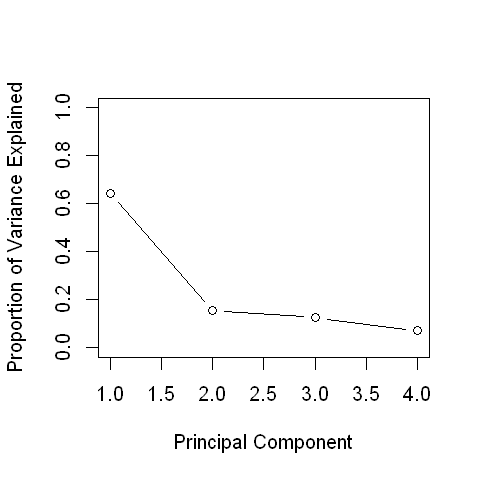

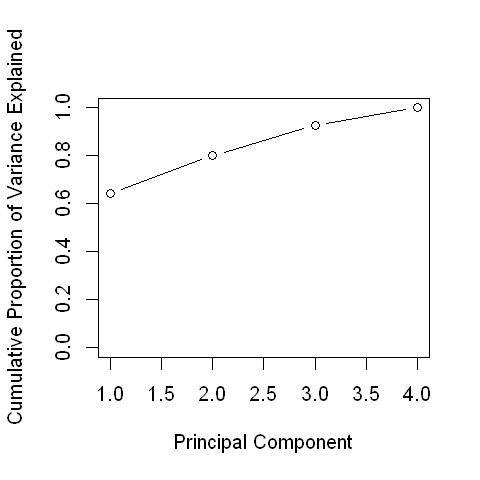

In [17]:
library(repr)
# Change plot size to 4 x 3
    options(repr.plot.width=4, repr.plot.height=4)


# Plot variance explained for each principal component
plot(pve, xlab = "Principal Component",
     ylab = "Proportion of Variance Explained",
     ylim = c(0, 1), type = "b")

# Plot cumulative proportion of variance explained
plot(cumsum(pve), xlab = "Principal Component",
     ylab = "Cumulative Proportion of Variance Explained",
     ylim = c(0, 1), type = "b")

### 3.3) (video) Practical issues with PCA

Some issues that you can find in your data are:

- Scaling the data
- Missing values (you can handle it by in two ways):
    - Drop observation with missing values
    - impute/estimate missing values
- Categorical data:
    - Do not use categorical data features
    - Encode categorical features as numbers 
    
Note: you can scaling your data with the paramether `scale = TRUE` inside the function `prcomp`.

#### Practical issues: scaling
You saw in the video that scaling your data before doing PCA changes the results of the PCA modeling. Here, you will perform PCA with and without scaling, then visualize the results using biplots.

Sometimes scaling is appropriate when the variances of the variables are substantially different. This is commonly the case when variables have different units of measurement, for example, degrees Fahrenheit (temperature) and miles (distance). Making the decision to use scaling is an important step in performing a principal component analysis.

**Exercise**
The same Pokemon dataset is available in your workspace as `pokemon`, but one new variable has been added: `Total`.

- There is some code at the top of the editor to calculate the `mean` and `standard deviation` of each variable in the model. Run this code to see how the scale of the variables differs in the original data.
- Create a PCA model of pokemon with scaling, assigning the result to `pr.with.scaling`.
- Create a PCA model of pokemon without scaling, assigning the result to `pr.without.scaling`.
- Use `biplot()` to plot both models (one at a time) and compare their outputs.


*Answer*


    # Mean of each variable
    colMeans(pokemon)

    # Standard deviation of each variable
    apply(pokemon, 2, sd)

    # PCA model with scaling: pr.with.scaling
    pr.with.scaling<-prcomp(pokemon, center = TRUE, scale = TRUE)


    # PCA model without scaling: pr.without.scaling
    pr.without.scaling<-prcomp(pokemon, center = TRUE, scale = FALSE)

    # Create biplots of both for comparison
    biplot(pr.with.scaling)

    biplot(pr.without.scaling)


## 4.0) Putting it all together with a case study
The goal of this chapter is to guide you through a complete analysis using the unsupervised learning techniques covered in the first three chapters. You'll extend what you've learned by combining PCA as a preprocessing step to clustering using data that consist of measurements of cell nuclei of human breast masses.

### 4.1) (video) Introduction to the case study

#### 4.1.1) Preparing the data
Unlike prior chapters, where we prepared the data for you for unsupervised learning, the goal of this chapter is to step you through a more realistic and complete workflow.

Recall from the video that the first step is to download and prepare the data.

**Exercise**
- Use `read.csv()` function to download the CSV (comma-separated values) file containing the data from the URL provided. Assign the result to `wisc.df`.
- Use `as.matrix()` to convert the features of the data (in columns 3 through 32) to a matrix. Store this in a variable called `wisc.data`.
- Assign the row names of `wisc.data` the values currently contained in the `id` column of `wisc.df`. While not strictly required, this will help you keep track of the different observations throughout the modeling process.
- Finally, set a vector called `diagnosis` to be `1` if a diagnosis is malignant (`"M"`) and `0` otherwise. Note that R coerces `TRUE` to `1` and FALSE to `0`.

*Answer*

In [11]:
url <- "http://s3.amazonaws.com/assets.datacamp.com/production/course_1903/datasets/WisconsinCancer.csv"

# Download the data: wisc.df
wisc.df<-read.csv(url)

# Convert the features of the data: wisc.data
wisc.data<-as.matrix(wisc.df[,3:32])

# Set the row names of wisc.data
row.names(wisc.data) <- wisc.df$id

# Create diagnosis vector
diagnosis <- as.numeric(wisc.df$diagnosis == "M",TRUE,FALSE)

#### 4.1.2) Performing PCA
The next step in your analysis is to perform PCA on `wisc.data`.

You saw in the last chapter that it's important to check if the data need to be scaled before performing PCA. Recall two common reasons for scaling data:

- The input variables use different units of measurement.
- The input variables have significantly different variances.

**Exercise**
The variables you created before, `wisc.data` and `diagnosis`, are still available in your workspace.

- Check the mean and standard deviation of the features of the data to determine if the data should be scaled. Use the `colMeans()` and `apply()` functions like you've done before.
- Execute PCA on the `wisc.data`, scaling if appropriate, and assign the model to `wisc.pr`.
- Inspect a summary of the results with the summary() function.

*Answer*

In [12]:
# Check column means and standard deviations
#colMeans(wisc.data)
#apply(wisc.data, 2 ,sd)

# Execute PCA, scaling if appropriate: wisc.pr
wisc.pr<- prcomp(wisc.data, center = TRUE, scale = TRUE)

# Look at summary of results
summary(wisc.pr)

Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     3.6444 2.3857 1.67867 1.40735 1.28403 1.09880 0.82172
Proportion of Variance 0.4427 0.1897 0.09393 0.06602 0.05496 0.04025 0.02251
Cumulative Proportion  0.4427 0.6324 0.72636 0.79239 0.84734 0.88759 0.91010
                           PC8    PC9    PC10   PC11    PC12    PC13    PC14
Standard deviation     0.69037 0.6457 0.59219 0.5421 0.51104 0.49128 0.39624
Proportion of Variance 0.01589 0.0139 0.01169 0.0098 0.00871 0.00805 0.00523
Cumulative Proportion  0.92598 0.9399 0.95157 0.9614 0.97007 0.97812 0.98335
                          PC15    PC16    PC17    PC18    PC19    PC20   PC21
Standard deviation     0.30681 0.28260 0.24372 0.22939 0.22244 0.17652 0.1731
Proportion of Variance 0.00314 0.00266 0.00198 0.00175 0.00165 0.00104 0.0010
Cumulative Proportion  0.98649 0.98915 0.99113 0.99288 0.99453 0.99557 0.9966
                          PC22    PC23   PC24 

#### 4.1.3) Interpreting PCA results
Now you'll use some visualizations to better understand your PCA model. You were introduced to one of these visualizations, the biplot, in an earlier chapter.

You'll run into some common challenges with using biplots on real-world data containing a non-trivial number of observations and variables, then you'll look at some alternative visualizations. You are encouraged to experiment with additional visualizations before moving on to the next exercise.

**Exercise**
The variables you created before, `wisc.data`, `diagnosis`, and `wisc.pr`, are still available.

- Create a biplot of the `wisc.pr` data. What stands out to you about this plot? Is it easy or difficult to understand? Why?
- Execute the code to scatter plot each observation by principal components 1 and 2, coloring the points by the diagnosis.
- Repeat the same for principal components 1 and 3. What do you notice about these plots?

*Answer*

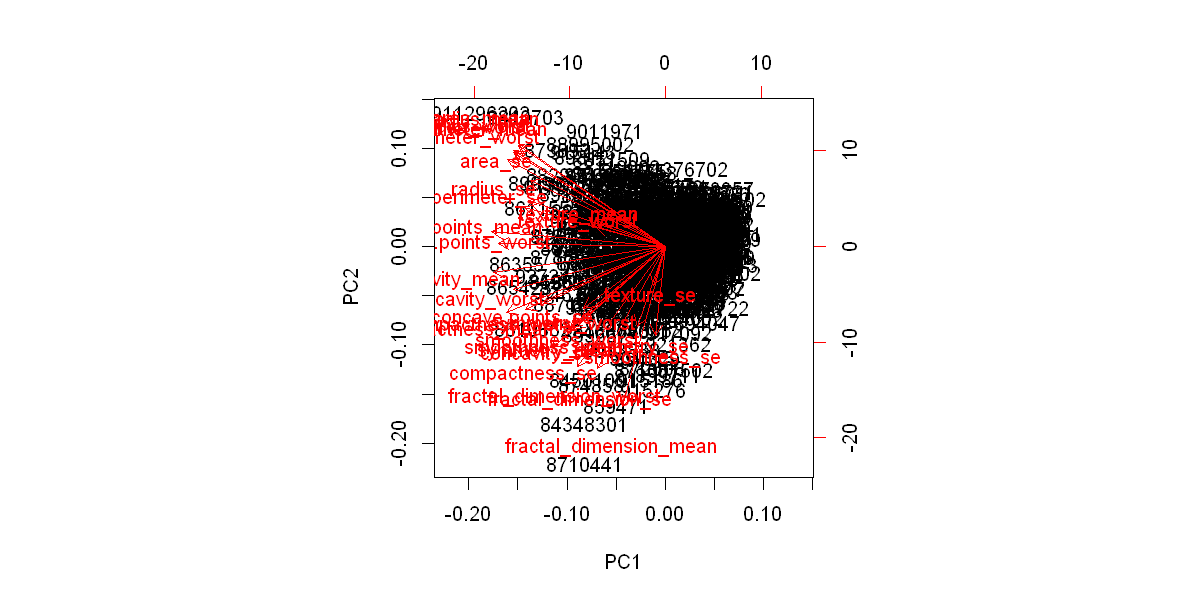

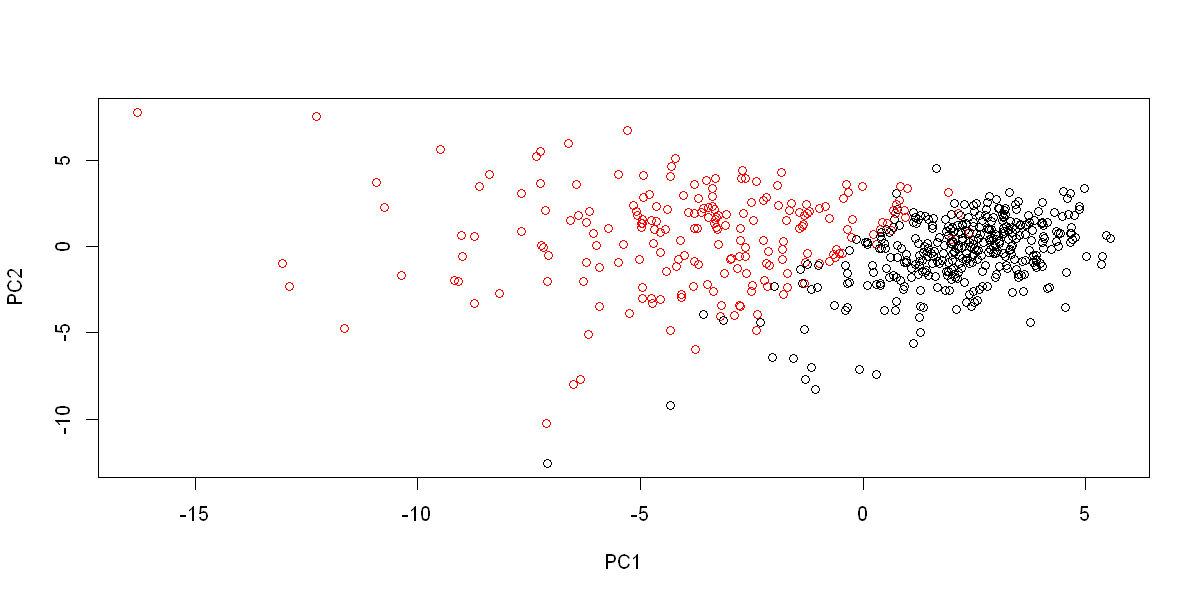

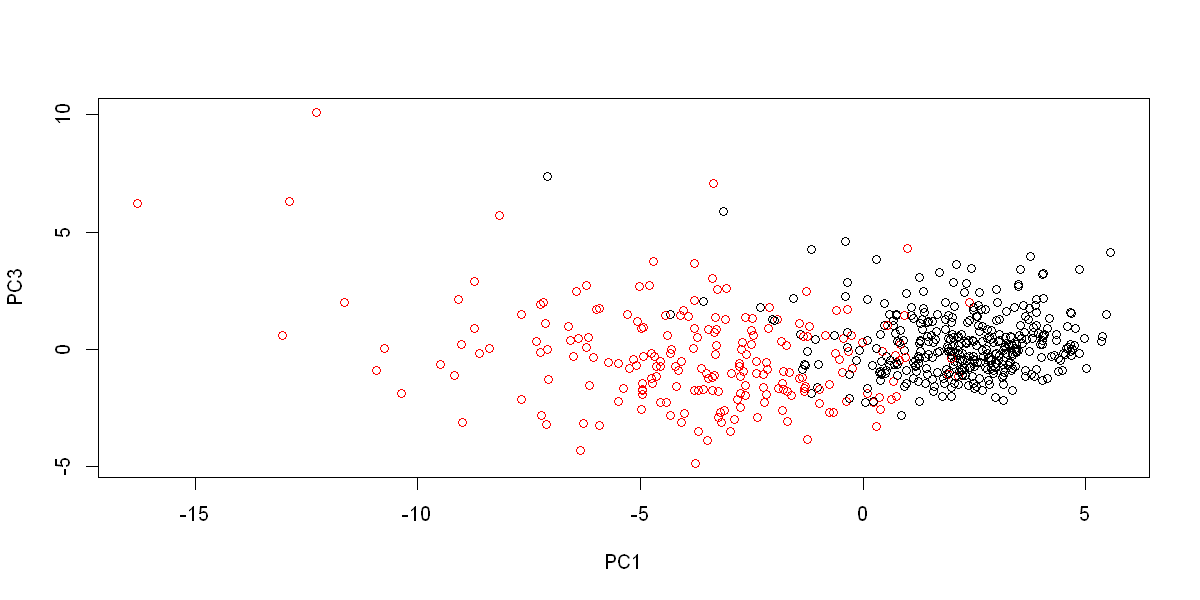

In [13]:
# Create a biplot of wisc.pr
biplot(wisc.pr)

# Scatter plot observations by components 1 and 2
plot(wisc.pr$x[, c(1, 2)], col = (diagnosis + 1), 
     xlab = "PC1", ylab = "PC2")

# Repeat for components 1 and 3
plot(wisc.pr$x[, c(1, 3)], col = (diagnosis + 1), 
     xlab = "PC1", ylab = "PC3")

# Do additional data exploration of your choosing below (optional)


#### 4.1.4) Variance explained
In this exercise, you will produce scree plots showing the proportion of variance explained as the number of principal components increases. The data from PCA must be prepared for these plots, as there is not a built-in function in R to create them directly from the PCA model.

As you look at these plots, ask yourself if there's an elbow in the amount of variance explained that might lead you to pick a natural number of principal components. If an obvious elbow does not exist, as is typical in real-world datasets, consider how else you might determine the number of principal components to retain based on the scree plot.

**Exercise**

The variables you created before, wisc.data, diagnosis, and wisc.pr, are still available.

- Calculate the variance of each principal component by squaring the `sdev` component of `wisc.pr`. Save the result as an object called `pr.var`.
- Calculate the variance explained by each principal component by dividing by the total variance explained of all principal components. Assign this to a variable called `pve`.
- Create a plot of variance explained for each principal component.
- Using the `cumsum()` function, create a plot of cumulative proportion of variance explained.

*Answer*

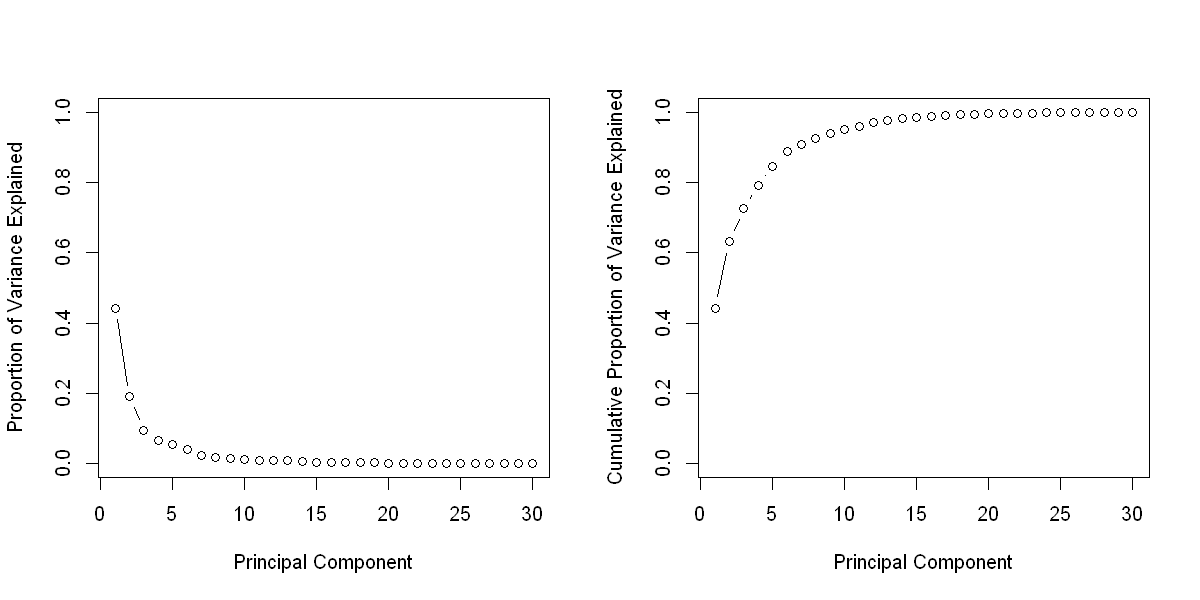

In [14]:
library(repr)
# Change plot size to 4 x 3
    options(repr.plot.width=10, repr.plot.height=5)



# Set up 1 x 2 plotting grid
par(mfrow = c(1, 2))

# Calculate variability of each component
pr.var<-wisc.pr$sdev^2

# Variance explained by each principal component: pve
pve<-pr.var/sum(pr.var)

# Plot variance explained for each principal component
plot(pve, xlab = "Principal Component", 
     ylab = "Proportion of Variance Explained", 
     ylim = c(0, 1), type = "b")

# Plot cumulative proportion of variance explained
plot(cumsum(pve), xlab = "Principal Component", 
     ylab = "Cumulative Proportion of Variance Explained", 
     ylim = c(0, 1), type = "b")


#### Communicating PCA results
This exercise will check your understanding of the PCA results, in particular the loadings and variance explained. The loadings, represented as vectors, explain the mapping from the original features to the principal components. The principal components are naturally ordered from the most variance explained to the least variance explained.

The variables you created before—wisc.data, diagnosis, wisc.pr, and pve—are still available.

For the first principal component, what is the component of the loading vector for the feature concave.points_mean? What is the minimum number of principal components required to explain 80% of the variance of the data?

Answer: -0.26085376, 5

In [15]:
#Try printing wisc.pr$rotation[, 1:3] to the console! That returns the components 
# of the loading vectors for all features for the first three principal components.
head(wisc.pr$rotation[,1:3])

# to see the specific component
wisc.pr$rotation["concave.points_mean", 1:3]

,PC1,PC2,PC3
radius_mean,-0.2189024,0.23385713,-0.008531243
texture_mean,-0.1037246,0.05970609,0.064549903
perimeter_mean,-0.2275373,0.21518136,-0.009314220
area_mean,-0.2209950,0.23107671,0.028699526
smoothness_mean,-0.1425897,-0.18611302,-0.104291904
compactness_mean,-0.2392854,-0.15189161,-0.074091571


PC1         PC2         PC3 
-0.26085376  0.03476750 -0.02556354

#### 4.2.1) Hierarchical clustering of case data
The goal of this exercise is to do hierarchical clustering of the observations. Recall from Chapter 2 that this type of clustering does not assume in advance the number of natural groups that exist in the data.

As part of the preparation for hierarchical clustering, distance between all pairs of observations are computed. Furthermore, there are different ways to link clusters together, with single, complete, and average being the most common linkage methods.

**Exercise**
The variables you created before, `wisc.data`, `diagnosis`, `wisc.pr`, and `pve`, are available in your workspace.

- Scale the `wisc.data` data and assign the result to `data.scaled`.
- Calculate the (Euclidean) distances between all pairs of observations in the new scaled dataset and assign the result to `data.dist`.
- Create a hierarchical clustering model using `complete` linkage. Manually specify the method argument to `hclust()` and assign the results to `wisc.hclust`.

*Answer*


In [16]:
# Scale the wisc.data data: data.scaled
data.scaled<-scale(wisc.data)

# Calculate the (Euclidean) distances: data.dist
data.dist<- dist(data.scaled)

# Create a hierarchical clustering model: wisc.hclust
wisc.hclust<-hclust(data.dist, method = "complete")

#### 4.2.2) Selecting number of clusters
In this exercise, you will compare the outputs from your hierarchical clustering model to the actual diagnoses. Normally when performing unsupervised learning like this, a target variable isn't available. We do have it with this dataset, however, so it can be used to check the performance of the clustering model.

When performing supervised learning—that is, when you're trying to predict some target variable of interest and that target variable is available in the original data—using clustering to create new features may or may not improve the performance of the final model. This exercise will help you determine if, in this case, hierarchical clustering provides a promising new feature.

**Exercise**
wisc.data, diagnosis, wisc.pr, pve, and wisc.hclust are available in your workspace.

- Use `cutree()` to cut the tree so that it has 4 clusters. Assign the output to the variable `wisc.hclust.clusters`.
- Use the `table()` function to compare the cluster membership to the actual diagnoses.

*Answer*

In [21]:
# Cut tree so that it has 4 clusters: wisc.hclust.clusters
wisc.hclust.clusters<-cutree(wisc.hclust, k = 4)

# Compare cluster membership to actual diagnoses
table(wisc.hclust.clusters, diagnosis)

                    diagnosis
wisc.hclust.clusters   0   1
                   1  12 165
                   2   2   5
                   3 343  40
                   4   0   2

#### 4.2.3) k-means clustering and comparing results
As you now know, there are two main types of clustering: hierarchical and k-means.

In this exercise, you will create a k-means clustering model on the Wisconsin breast cancer data and compare the results to the actual diagnoses and the results of your hierarchical clustering model. Take some time to see how each clustering model performs in terms of separating the two diagnoses and how the clustering models compare to each other.

**Exercise**
wisc.data, diagnosis, and wisc.hclust.clusters are still available.

- Create a k-means model on `wisc.data`, assigning the result to `wisc.km`. Be sure to create 2 clusters, corresponding to the actual number of diagnosis. Also, remember to `scale` the data and `repeat` the algorithm 20 times to find a well performing model.
- Use the `table()` function to compare the cluster membership of the k-means model to the actual diagnoses contained in the diagnosis vector. How well does k-means separate the two diagnoses?
- Use the table() function to compare the cluster membership of the k-means model to the hierarchical clustering model. Recall the cluster membership of the hierarchical clustering model is contained in wisc.hclust.clusters.

*Answer*

In [34]:
# Create a k-means model on wisc.data: wisc.km
wisc.km<-kmeans(scale(wisc.data), centers = 2, nstart= 20)

# Compare k-means to actual diagnoses
table(wisc.km$cluster, diagnosis)

# Compare k-means to hierarchical clustering
table(wisc.km$cluster, wisc.hclust.clusters)

   diagnosis
      0   1
  1  14 175
  2 343  37

   wisc.hclust.clusters
      1   2   3   4
  1 160   7  20   2
  2  17   0 363   0

#### 4.2.4) Clustering on PCA results
In this final exercise, you will put together several steps you used earlier and, in doing so, you will experience some of the creativity that is typical in unsupervised learning.

Recall from earlier exercises that the PCA model required significantly fewer features to describe 80% and 95% of the variability of the data. In addition to normalizing data and potentially avoiding overfitting, PCA also uncorrelates the variables, sometimes improving the performance of other modeling techniques.

Let's see if PCA improves or degrades the performance of hierarchical clustering.

**Exercise**
wisc.pr, diagnosis, wisc.hclust.clusters, and wisc.km are still available in your workspace.

- Using the minimum number of principal components required to describe at least 90% of the variability in the data, create a hierarchical clustering model with complete linkage. Assign the results to `wisc.pr.hclust`.
- Cut this hierarchical clustering model into `4` clusters and assign the results to `wisc.pr.hclust.clusters`.
- Using `table()`, compare the results from your new hierarchical clustering model with the actual `diagnoses`. How well does the newly created model with four clusters separate out the two diagnoses?
- How well do the k-means and hierarchical clustering models you created in previous exercises do in terms of separating the diagnoses? Again, use the `table()` function to compare the output of each model with the vector containing the actual diagnoses.

*Answer*

In [45]:
# Create a hierarchical clustering model: wisc.pr.hclust
wisc.pr.hclust <- hclust(dist(wisc.pr$x[, 1:7]), method = "complete")

# Cut model into 4 clusters: wisc.pr.hclust.clusters
wisc.pr.hclust.clusters <- cutree(wisc.pr.hclust, k = 4)

# Compare to actual diagnoses
table(diagnosis, wisc.pr.hclust.clusters)

# Compare to k-means and hierarchical
table(diagnosis, wisc.hclust.clusters)
table(diagnosis, wisc.km$cluster)

         wisc.pr.hclust.clusters
diagnosis   1   2   3   4
        0   5 350   2   0
        1 113  97   0   2

         wisc.hclust.clusters
diagnosis   1   2   3   4
        0  12   2 343   0
        1 165   5  40   2

         
diagnosis   1   2
        0  14 343
        1 175  37

In [18]:
library(repr)
# Change plot size to 4 x 3
    options(repr.plot.width=4, repr.plot.height=3)

**Exercise**

*Answer*